# **MNIST 데이터셋을 활용한 클러스터링**

# MNIST (Modified National Institute of Standards and Technology)

- 사용 목적: 손글씨 숫자 (0~9) 이미지를 분류하기 위한 데이터

- 형태: 이미지 --> 벡터화된 숫자데이터

- 크기: 총 70,000 (training: 60,000; test: 10,000)

- 차원: 748차원 벡터

- 레이블 수: 10개

- 형식: 벡터, 레이블 pair




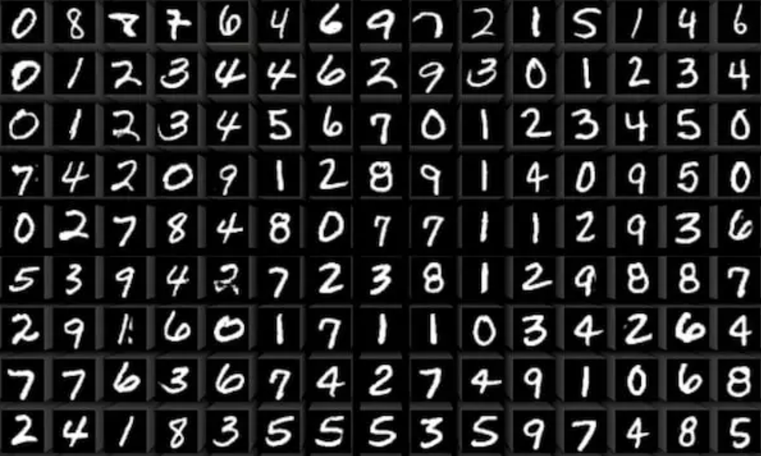

# 클러스터링을 수행하여 그룹핑하기
- 사용할 클러스터링 기법: k-Means, DBSCAN, AGNES, Spectral clustering (다음주 진행 예정), EM (다음주 진행예정)

- 가장 좋아보이는 클러스터링 기법이 무엇인지 확인

- 문제가 있어보이는 클러스터링 기법이 있으면 왜 문제인지 그 문제가 나타나는 이유를 추측

- 각 클러스터링 기법의 최적의 파라미터 찾기 (kmeans의 k는 항상 10으로 고정)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # 정규화
y = mnist.target.astype(int)

# 연산 시간 단축을 위해 5000개 샘플만 사용
X_sample = X[:5000]
y_sample = y[:5000]

In [3]:
# 시각화를 위한 2차원 PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

In [5]:
#클러스터링 알고리즘

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_sample)

dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters = dbscan.fit_predict(X_pca)  # PCA 데이터로 클러스터링

agglo = AgglomerativeClustering(n_clusters=10)
clusters = agglo.fit_predict(X_sample)  # 784차원 원본 데이터 사용 가능

spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
clusters = spectral.fit_predict(X_pca)

gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
gmm.fit(X_pca)
clusters = gmm.predict(X_pca)


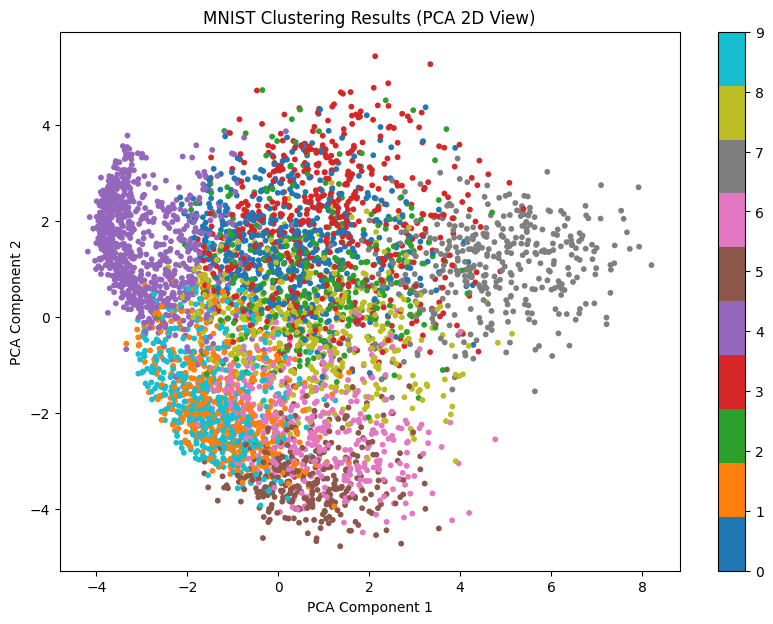

In [6]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=10)
plt.title("MNIST Clustering Results (PCA 2D View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, ticks=range(10))
plt.show()

Clustering Accuracy (label matching): 0.65


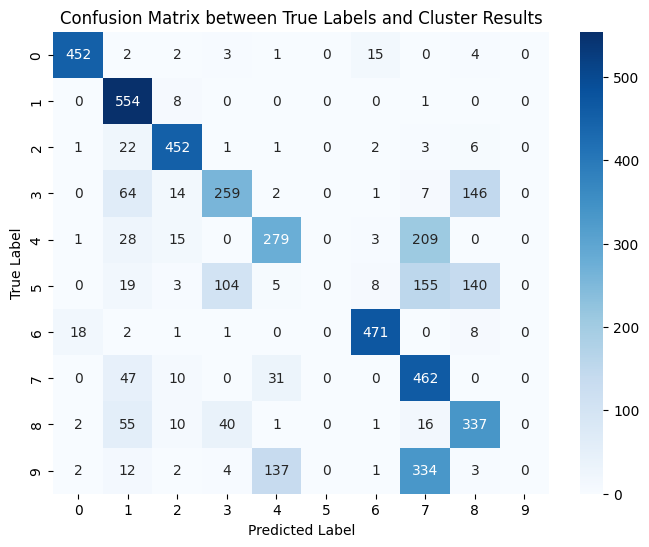

In [ ]:
# 각 클러스터가 어떤 숫자를 가장 많이 포함하는지 확인
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    if np.any(mask):
        labels[mask] = mode(y_sample[mask])[0]

# 정확도 측정
acc = accuracy_score(y_sample, labels)
print(f"Clustering Accuracy (label matching): {acc:.2f}")

# Confusion Matrix 시각화
conf_mat = confusion_matrix(y_sample, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix between True Labels and Cluster Results")
plt.show()